<a href="https://colab.research.google.com/github/GiaHan2702/image_processing/blob/main/lab3_Ex2_histogramequal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cv2.equalizehist(..)

EX2: CAN BANG PHO VOI HINH MAU
COLOR HISTOGRAM EQUALIZATION

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math
from google.colab import drive
#drive.mount('/content/drive')
import os

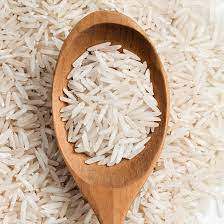

In [8]:
# display ori image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing Files Data/lab3/rice.jfif',cv2.IMREAD_COLOR)
cv2_imshow(image)

Size of Image Rice:
150528


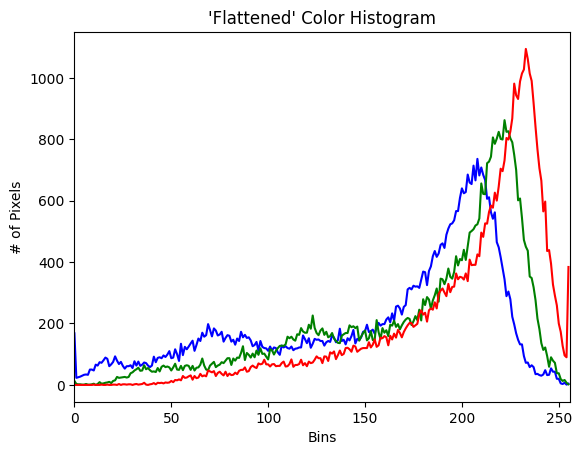

In [9]:
print('Size of Image Rice:')
x = np.size(image)
print(x)

# calculate histogram cv2.calhist : receive 5 inputs: (img, channels, masks, hist size...)
# pyimagesearch.com
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])




Text(0.5, 1.0, 'Histogram')

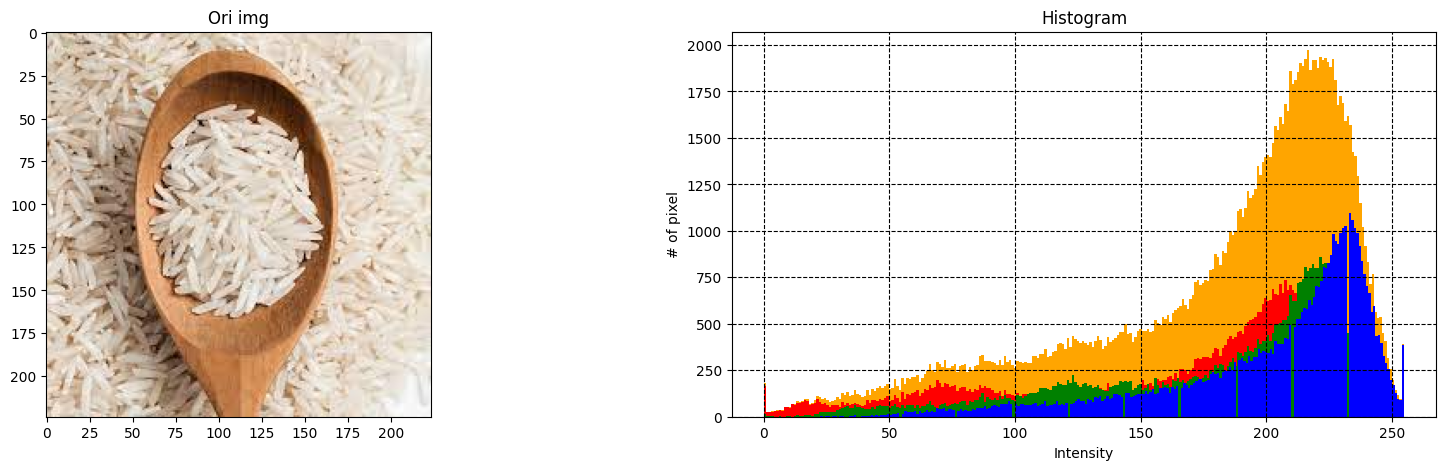

In [10]:
# SUA BAI
fig,(fig1,fig2) = plt.subplots(1,2,figsize = (20,5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # cv2 read BGR
plt.title('Ori img')

# calculate histogram cv2.calhist : receive 5 inputs: (img, channels, masks, hist size...)
# sketch histogram with each color: rgb: channel 0,1,2
# pyimagesearch.com
# grayscale channel = 0; mask:mat na can bang histogram: ko xai
hist = cv2.calcHist([image],[0,1,2],None,[256,256,256],[0,256,0,256,0,256])
fig2.hist(image.ravel(),bins = 256, color = 'orange') # overall
fig2.hist(image[:,:,0].ravel(),bins = 256, color = 'red')
fig2.hist(image[:,:,1].ravel(),bins = 256, color = 'green')
fig2.hist(image[:,:,2].ravel(),bins = 256, color = 'blue')
#display
fig2.grid(color = 'black', linestyle = '--')
#fig2.set_xlim([0,255]), fig2.set_ylim(0, max(hist)*1.1)
fig2.set_xlabel('Intensity'), fig2.set_ylabel('# of pixel')
fig2.set_title('Histogram')





In [18]:
# define a function to equalize img
def color_histogram_equalization(image_in):
  # separate into 3 colors: blue, green, red: doi vs cv2
  b,g,r = cv2.split(image_in) # chia ra 3 kenh
  # lam pho tung kenh
  h_b,bin_b = np.histogram(b.flatten(), 256, [0,256])
  h_g,bin_g = np.histogram(g.flatten(), 256, [0,256])
  h_r,bin_r = np.histogram(r.flatten(), 256, [0,256]) # max
  # trai deu pho + tinh ham tich luy
  # calculate cdf cua tung color
  cdf_b = np.cumsum(h_b)
  cdf_g = np.cumsum(h_g)
  cdf_r = np.cumsum(h_r)
  # san  = pho: thay the gtri thap = gtri tb
  # spread low bins by replacing them with mean of the pixel values
  cdf_m_b = np.ma.masked_equal(cdf_b,0)
  cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max () - cdf_m_b.min()) # lam gian max, min ra
  cdf_final_b = np.ma.filled(cdf_m_b, 0).astype('uint8')

  cdf_m_g = np.ma.masked_equal(cdf_g,0)
  cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max () - cdf_m_g.min()) # lam gian max, min ra
  cdf_final_g = np.ma.filled(cdf_m_g, 0).astype('uint8')

  cdf_m_r = np.ma.masked_equal(cdf_r,0)
  cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max () - cdf_m_r.min()) # lam gian max, min ra
  cdf_final_r = np.ma.filled(cdf_m_r, 0).astype('uint8')

# merge 3 channels into a single color img
  img_b = cdf_final_b[b]
  img_g = cdf_final_b[g]
  img_r = cdf_final_b[r]
  img_out = cv2.merge((img_b, img_g, img_r))

  # validate equalization
  equa_b = cv2.equalizeHist(b)
  equa_g = cv2.equalizeHist(g)
  equa_r = cv2.equalizeHist(r)

  output = np.zeros((np.shape(image_in)[0], np.shape(image_in)[1], np.shape(image_in)[2]))
  output[:,:,0] = equa_b
  output[:,:,1] = equa_g
  output[:,:,2] = equa_r
  return output

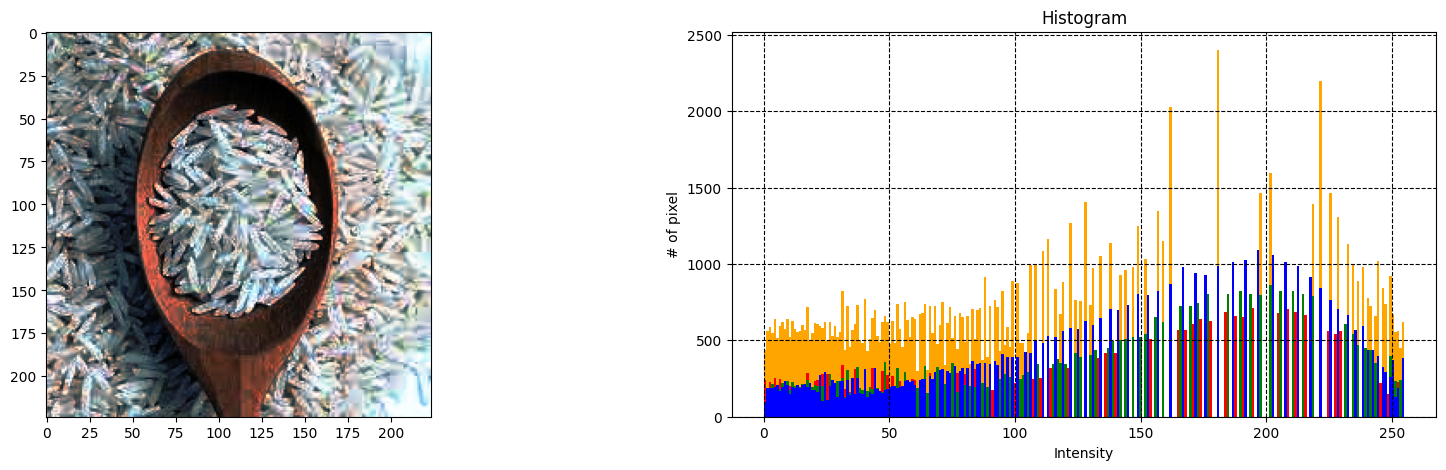

<Figure size 640x480 with 0 Axes>

In [25]:
# ... (your other code)

#  perform equalize hist

eqImg = color_histogram_equalization(image)

# Convert image to uint8 format if necessary
eqImg = np.uint8(eqImg)


fig, (fig3, fig4) = plt.subplots(1, 2, figsize=(20, 5))
# plt.subplot(121), plt.imshow(cv2.cvtColor(eqImg, cv2.COLOR_BGR2RGB)) # cv2 read BGR
plt.title('Ori img')

# calculate histogram cv2.calhist : receive 5 inputs: (img, channels, masks, hist size...)
# sketch histogram with each color: rgb: channel 0,1,2
# pyimagesearch.com
# grayscale channel = 0; mask:mat na can bang histogram: ko xai
# Flatten the image before calculating histogram
#hist = cv2.calcHist([eqImg.flatten()], [0], None, [256], [0, 256])
#hist = cv2.calcHist([eqImg],[0,1,2],None,[256,256,256],[0,256,0,256,0,256])

# grayscale channel = 0; mask:mat na can bang histogram: ko xai
hist = cv2.calcHist([eqImg],[0,1,2],None,[256,256,256],[0,256,0,256,0,256])

# Rest of your code remains the same
fig4.hist(eqImg.ravel(), bins=256, color='orange')  # overall
fig4.hist(eqImg[:, :, 0].ravel(), bins=256, color='red')
fig4.hist(eqImg[:, :, 1].ravel(), bins=256, color='green')
fig4.hist(eqImg[:, :, 2].ravel(), bins=256, color='blue')

# display
fig4.grid(color='black', linestyle='--')
# fig2.set_xlim([0,255]), ffig4ig2.set_ylim(0, max(hist)*1.1)
fig4.set_xlabel('Intensity'), fig4.set_ylabel('# of pixel')
fig4.set_title('Histogram')
# Uncomment the line to display the image
plt.subplot(121), plt.imshow(cv2.cvtColor(eqImg, cv2.COLOR_BGR2RGB))  # cv2 reads BGR

# Add the following line to show the plot
plt.show()


# save img on drive
path = '/content/drive/MyDrive/Colab Notebooks/Image Processing Files Data/lab3'
plt.savefig(os.path.join(path, 'ex2_eqImg_hist.png'), dpi=600)
